In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 6.2MB/s 


In [ ]:
import pandas as pd
import numpy as np
import chart_studio.plotly as plotly
import plotly.figure_factory as ff
from plotly import graph_objs as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [ ]:
df = pd.read_csv('/content/weather_temperature_yilan.csv')
# dataset = dataframe.values
# dataset = dataset.astype('float32')
df.head()

,Date,Temperature
0,2013/01/01,13.0
1,2013/01/02,20.0
2,2013/01/03,15.0
3,2013/01/04,15.0
4,2013/01/05,19.0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df['Temperature'], name="temperature",line_color='green'))
# fig.add_trace(go.Scatter(x=df.Date, y=df['Close'], name="stock_close",line_color='dimgray'))
fig.layout.update(title_text='Time Series data with Rangeslider',xaxis_rangeslider_visible=True)
fig

In [ ]:
X = df[['Date', 'Temperature']]
y = df.iloc[:,1]

In [ ]:
train_df = pd.DataFrame()
train_df['ds'] = pd.to_datetime(X["Date"])
train_df['y']=y
train_df.head(2)

,ds,y
0,2013-01-01,13.0
1,2013-01-02,20.0


In [ ]:
# data_pred = df[['Date','Close']]
# data_pred=data_pred.rename(columns={"Date": "ds", "Close": "y"})

In [ ]:
model = Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=365)
future.tail(2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
2552,2019-12-30
2553,2019-12-31


In [ ]:
forecast = model.predict(future)

In [ ]:
fig1 = plot_plotly(model, forecast)
fig1

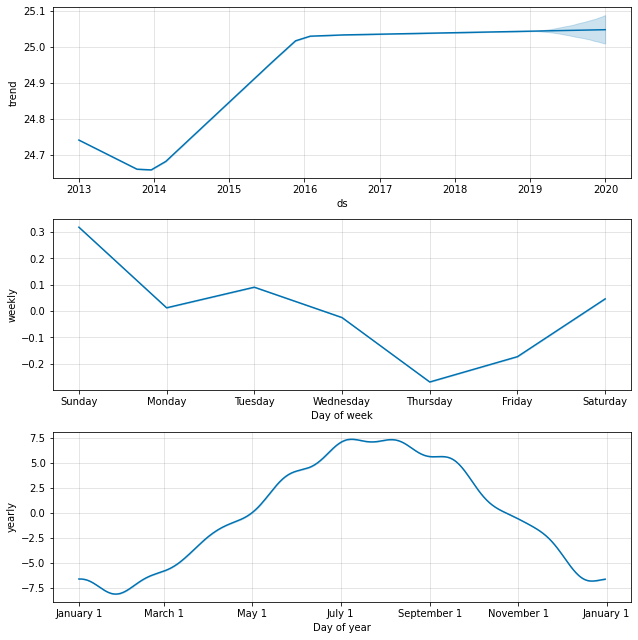

In [ ]:
#plot component wise forecast
# st.write("Component wise forecast")
fig2 = model.plot_components(forecast)

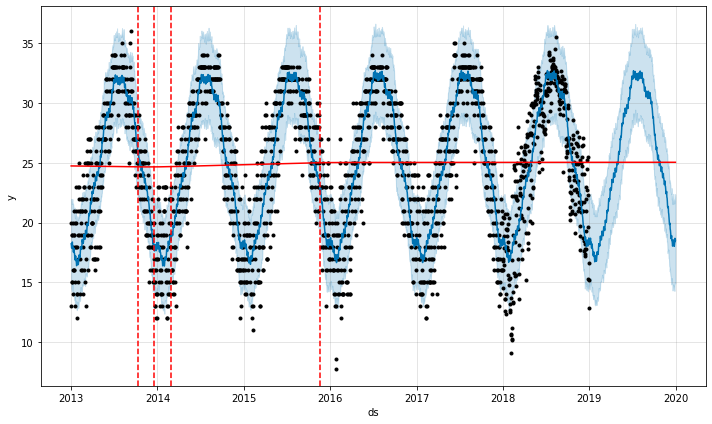

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [ ]:
model.changepoints

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


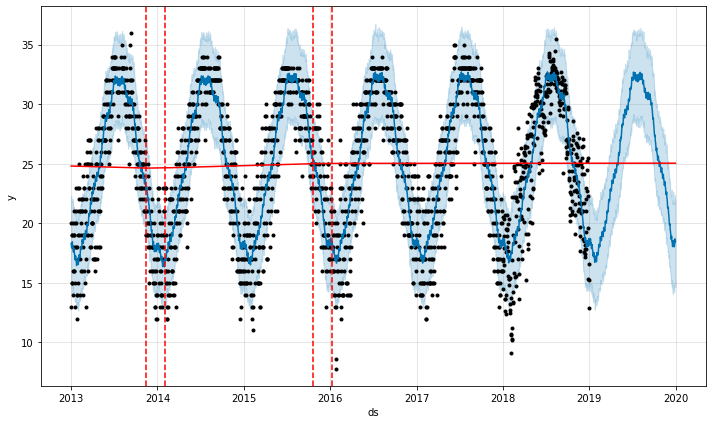

In [ ]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


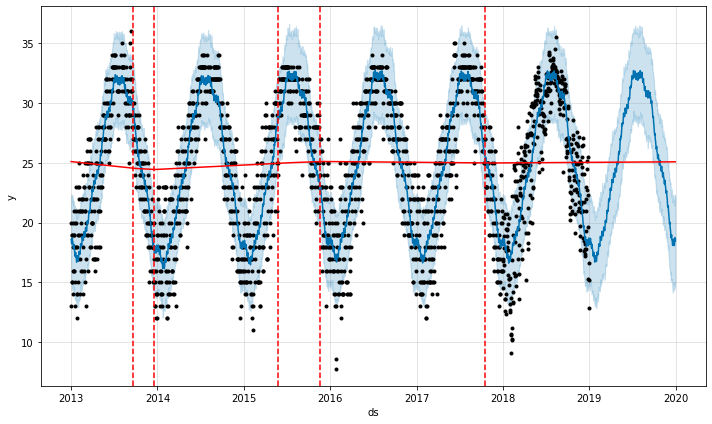

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_df).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)